#Import Related Library

In [539]:
import nltk
import string 
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from nltk.corpus import stopwords   #remove stop words using NLKT library of stop words
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Import Party Platform for Republican and Democrats
## (1856-2016) = 40 Elections

In [540]:
doc_d = []
doc_r = []
name_d = []
name_r = []
date = []
num_of_election = 41
for i in range(num_of_election): #Democratic
  date.append(i*4+1856)
  f = str(i*4+1856)+"_d.txt"
  file_d = open(f)
  temp = []
  for line in file_d:
    w = line.split(' ')
    for i in w:
      temp.append(i.lower())
  file_d.close()
  doc_d.append(temp)
  name_d.append(f)

for i in range(num_of_election): #Democratic
  f = str(i*4+1856)+"_r.txt"
  file_d = open(f)
  temp = []
  for line in file_d:
    w = line.split(' ')
    for i in w:
      temp.append(i.lower())
  file_d.close()
  doc_r.append(temp)
  name_r.append(f)


#Cleanning Text

In [541]:
def preprocess(corpus_doc):
  pp = []
  for p in string.punctuation:
    pp.append(p)
  pp.append('.')
  pp.append('\n')
  pp.append('-')
  for i in range(0,len(corpus_doc)): #Removing all punctuation
    corpus_doc[i] = [j for j in corpus_doc[i] if j!='\n']  #remove all \n character
    corpus_doc[i] = [j for j in corpus_doc[i] if len(j)>0] #remove all empty word
    for j in range(0,len(corpus_doc[i])):
      for p in pp:
        corpus_doc[i][j] = corpus_doc[i][j].replace(p,'')
  return corpus_doc

In [542]:
  #string.punctuation


doc_d = preprocess(doc_d)
doc_r = preprocess(doc_r)


##Lenght of Platforms Before Stopword Removal

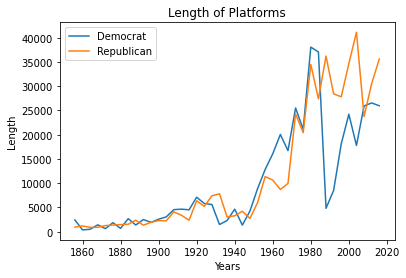

In [543]:
len_d = []
len_r = []
for i in range(len(doc_d)):
  len_d.append(len(doc_d[i]))
  len_r.append(len(doc_r[i]))

plt.xlabel('Years')
plt.ylabel('Length')
plt.plot(date,len_d,label="Democrat")
plt.plot(date,len_r,label="Republican") #Strictly
plt.title("Length of Platforms")
plt.legend(loc='upper left')
plt.show()

In [544]:

  
def stopword_remove(corpus_doc):
  from nltk.corpus import stopwords   #remove stop words using NLKT library of stop words
  nltk.download("stopwords")
  stopwords = stopwords.words('english')
  n = []
  for i in range(0,len(corpus_doc)):
    inner = []
    for j in range(0,len(corpus_doc[i])):
      if corpus_doc[i][j] not in stopwords:
        inner.append(corpus_doc[i][j])
    n.append(inner)
  return n

doc_d = stopword_remove(doc_d) #list of list of words
doc_r = stopword_remove(doc_r)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [545]:
#not doing any stemming or lemmatizing for now 

#Turn to DTM

In [546]:
#convert to DTM
doc_combine = []
name_combine = []
for i in range(0,num_of_election):
  doc_combine.append(doc_d[i])
  doc_combine.append(doc_r[i])
  name_combine.append(name_d[i])
  name_combine.append(name_r[i])


long_combine = []
for i in range(0,len(doc_combine)):
  txt = " "
  for j in range(0,len(doc_combine[i])):
    txt+= doc_combine[i][j]
    txt+= " "
  long_combine.append(txt)


cv = CountVectorizer(long_combine) #unigram only 
count_vector = cv.fit_transform(long_combine)
feats_here = cv.get_feature_names();
count_vector = count_vector.toarray()


cv2 = CountVectorizer(long_combine,ngram_range=(1,2)) #uni and bi-gram
count_vector2 = cv2.fit_transform(long_combine)
feats_here2 = cv2.get_feature_names();
count_vector2 = count_vector2.toarray()

cv3 = CountVectorizer(long_combine,ngram_range=(1,3)) #1,2,3 gram
count_vector3 = cv3.fit_transform(long_combine)
feats_here3 = cv3.get_feature_names();
count_vector3 = count_vector3.toarray()

df = pd.DataFrame(count_vector,columns=feats_here,index=name_combine)   #DTM of corpus here

df


,06,10,100,1000,10000,100000,1000000,100000000,1004,1008000000,100th,101,1010,102030,10279,103,104,105,10500000,105th,106,107,108,109,10988,10point,10th,10year,10yearolds,11,110,1100,11000,110000,1100000000,110000000000,111,11114,11141,1115000000,...,yields,yitzhak,yoke,york,yorks,yosemite,young,younger,youngest,youngsters,youre,youth,youthful,youths,yucca,yugoslav,yugoslavia,yugoslavs,zeal,zealand,zealanders,zealous,zealously,zenith,zero,zerobased,zerocarbon,zeroemission,zeroout,zerotolerance,zika,zimbabwe,zimbabwean,zimbabwes,zimmers,zionism,zip,zone,zones,zoning
1856_d.txt,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1856_r.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1860_d.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1860_r.txt,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1864_d.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008_r.txt,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,4,1,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,2,0,0,0,0,0,0,0,0
2012_d.txt,0,5,3,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2012_r.txt,0,1,2,0,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,5,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0
2016_d.txt,0,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,18,0,0,0,0,9,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,3,0,1,0


In [547]:
pairwise_sim = cosine_similarity(count_vector)
simdf = pd.DataFrame(pairwise_sim, columns = name_combine, index = name_combine)

pairwise_sim2 = cosine_similarity(count_vector2)
simdf2 = pd.DataFrame(pairwise_sim2, columns = name_combine, index = name_combine)

pairwise_sim3 = cosine_similarity(count_vector3)
simdf3 = pd.DataFrame(pairwise_sim3, columns = name_combine, index = name_combine)


pd.DataFrame(pairwise_sim, columns = name_combine, index = name_combine)


,1856_d.txt,1856_r.txt,1860_d.txt,1860_r.txt,1864_d.txt,1864_r.txt,1868_d.txt,1868_r.txt,1872_d.txt,1872_r.txt,1876_d.txt,1876_r.txt,1880_d.txt,1880_r.txt,1884_d.txt,1884_r.txt,1888_d.txt,1888_r.txt,1892_d.txt,1892_r.txt,1896_d.txt,1896_r.txt,1900_d.txt,1900_r.txt,1904_d.txt,1904_r.txt,1908_d.txt,1908_r.txt,1912_d.txt,1912_r.txt,1916_d.txt,1916_r.txt,1920_d.txt,1920_r.txt,1924_d.txt,1924_r.txt,1928_d.txt,1928_r.txt,1932_d.txt,1932_r.txt,...,1940_d.txt,1940_r.txt,1944_d.txt,1944_r.txt,1948_d.txt,1948_r.txt,1952_d.txt,1952_r.txt,1956_d.txt,1956_r.txt,1960_d.txt,1960_r.txt,1964_d.txt,1964_r.txt,1968_d.txt,1968_r.txt,1972_d.txt,1972_r.txt,1976_d.txt,1976_r.txt,1980_d.txt,1980_r.txt,1984_d.txt,1984_r.txt,1988_d.txt,1988_r.txt,1992_d.txt,1992_r.txt,1996_d.txt,1996_r.txt,2000_d.txt,2000_r.txt,2004_d.txt,2004_r.txt,2008_d.txt,2008_r.txt,2012_d.txt,2012_r.txt,2016_d.txt,2016_r.txt
1856_d.txt,1.000000,0.586317,0.501307,0.560864,0.526004,0.565418,0.616951,0.468657,0.385135,0.452984,0.432633,0.544203,0.467781,0.490981,0.542986,0.533446,0.522821,0.572784,0.580431,0.477166,0.542482,0.445970,0.517277,0.487923,0.510530,0.457371,0.517662,0.504489,0.516359,0.502120,0.528032,0.503886,0.532222,0.500562,0.506357,0.476366,0.511354,0.493874,0.394587,0.496619,...,0.405775,0.422968,0.313904,0.421315,0.390018,0.359462,0.424335,0.430752,0.450798,0.424231,0.402044,0.396562,0.344853,0.395610,0.414569,0.333545,0.415334,0.355381,0.394831,0.434970,0.376785,0.404659,0.402993,0.405842,0.316993,0.400625,0.361795,0.402671,0.336012,0.415771,0.288107,0.425603,0.298836,0.332146,0.344141,0.398822,0.321029,0.451268,0.314371,0.487876
1856_r.txt,0.586317,1.000000,0.407404,0.625041,0.485525,0.503199,0.532489,0.358247,0.355253,0.354156,0.297431,0.454653,0.313319,0.394561,0.404749,0.416473,0.335953,0.449805,0.415216,0.403446,0.487539,0.323213,0.427088,0.344063,0.425773,0.321883,0.434190,0.386579,0.444322,0.405222,0.442064,0.373397,0.414972,0.438886,0.356022,0.385865,0.385486,0.389563,0.270621,0.365770,...,0.313012,0.398551,0.294543,0.389568,0.337854,0.396836,0.310471,0.419735,0.342607,0.376556,0.351154,0.364439,0.288580,0.350318,0.311409,0.296613,0.338313,0.299953,0.316248,0.387586,0.288060,0.343817,0.271692,0.344733,0.253546,0.341318,0.278325,0.345568,0.242250,0.371812,0.211934,0.373606,0.217492,0.293125,0.264836,0.357882,0.255542,0.404023,0.251276,0.446199
1860_d.txt,0.501307,0.407404,1.000000,0.370675,0.422804,0.406295,0.378158,0.249936,0.244951,0.205931,0.255750,0.316592,0.310338,0.318331,0.316741,0.338182,0.338282,0.335816,0.372163,0.305511,0.401971,0.268937,0.294645,0.260961,0.305441,0.304136,0.363753,0.265055,0.352992,0.274476,0.320246,0.283658,0.356300,0.269422,0.356300,0.230413,0.355369,0.259145,0.237108,0.302150,...,0.233319,0.244821,0.250721,0.250681,0.303058,0.245982,0.283594,0.240556,0.324706,0.243686,0.285132,0.198138,0.184410,0.213329,0.233381,0.177630,0.225520,0.168238,0.247700,0.239698,0.252962,0.218543,0.264077,0.189659,0.145729,0.175952,0.133086,0.173088,0.188466,0.192119,0.145172,0.212550,0.121168,0.162726,0.141080,0.187767,0.167112,0.213173,0.121974,0.241901
1860_r.txt,0.560864,0.625041,0.370675,1.000000,0.393116,0.434106,0.486777,0.418131,0.370941,0.423795,0.378306,0.528842,0.368197,0.481727,0.494270,0.462400,0.370299,0.522192,0.532236,0.465576,0.522602,0.353684,0.481104,0.401786,0.475087,0.407842,0.521704,0.453031,0.518831,0.478206,0.512821,0.428830,0.514887,0.501854,0.469874,0.455629,0.490079,0.493155,0.337981,0.464726,...,0.331107,0.417370,0.326077,0.431196,0.392751,0.411082,0.388052,0.457081,0.445006,0.430789,0.424819,0.416250,0.335130,0.393487,0.381385,0.371779,0.397151,0.356982,0.390288,0.433188,0.371172,0.400252,0.340905,0.386950,0.303600,0.395209,0.318323,0.375891,0.281168,0.421025,0.243980,0.423485,0.233708,0.320936,0.295595,0.392341,0.269285,0.441566,0.290561,0.491898
1864_d.txt,0.526004,0.485525,0.422804,0.393116,1.000000,0.455053,0.493424,0.331212,0.320755,0.285204,0.339578,0.384920,0.348155,0.367443,0.351606,0.349509,0.329857,0.356743,0.

#Extract Similarity Between 

In [548]:

sim_data2=[]
sim_data3=[]
sim_data =[]
j = int(len(simdf)/2)
for i in range(0,j):
  sim_data.append(simdf.iloc[(i*2)+1][i*2])
  sim_data2.append(simdf2.iloc[(i*2)+1][i*2])
  sim_data3.append(simdf3.iloc[(i*2)+1][i*2])

diff = [0.1220,
0.1013,
0.1008,
0.0532,
0.1180,
0.0300,
0.0009,
0.0057,
0.0083,
0.0301,
0.0431,
0.0612,
0.1883,
0.0853,
0.1444,
0.0312,
0.2617,
0.2522,
0.1741,
0.1776,
0.2426,
0.0996,
0.0750,
0.0448,
0.1085,
0.1540,
0.0017,
0.2258,
0.0070,
0.2315,
0.0206,
0.0974,
0.1821,
0.0772,
0.0556,
0.0851,
0.0051,
0.0246,
0.0727,
0.0386,
0.0209]


In [549]:
len(diff)

41

##Testing Uni-gram,Bi-gram and Tri-gram Cosine Difference Versus Vote Difference

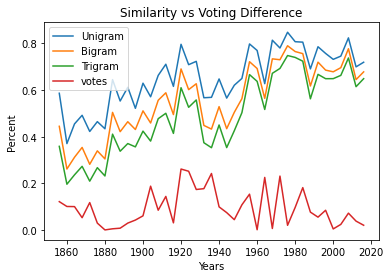

In [550]:

plt.xlabel('Years')
plt.ylabel('Percent')
plt.plot(date,sim_data,label="Unigram")
plt.plot(date,sim_data2,label="Bigram") #Strictly
plt.plot(date,sim_data3,label="Trigram")
plt.plot(date,diff,label="votes")
plt.title("Similarity vs Voting Difference")
plt.legend(loc='upper left')
plt.show()

##Just Unigram Consine Difference Agaisnt Voting Difference

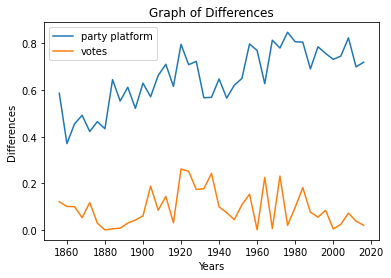

In [551]:

plt.xlabel('Years')
plt.ylabel('Differences')
plt.plot(date,sim_data,label="party platform")
plt.plot(date,diff,label="votes")
#plt.plot(date,(np.array(sim_data)-np.array(diff)),label="difference")
plt.title("Graph of Differences")
plt.legend(loc='upper left')
plt.show()

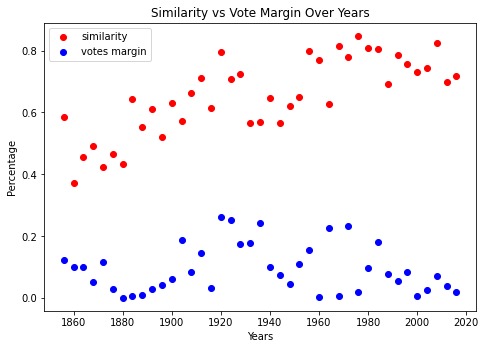

In [552]:

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(date, sim_data, color='r',label="similarity")
ax.scatter(date,diff, color='b',label="votes margin")
ax.set_xlabel('Years')
ax.set_ylabel('Percentage')
ax.set_title('Similarity vs Vote Margin Over Years')
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


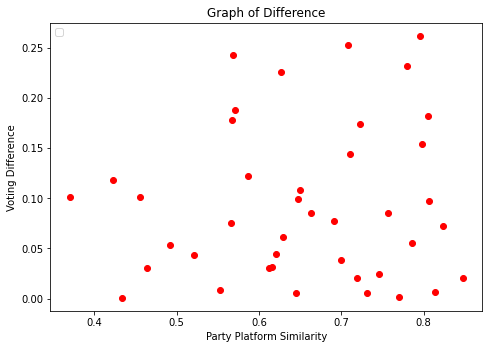

In [553]:



fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(sim_data, diff,color='r') #sim_data = platform diff
ax.set_xlabel('Party Platform Similarity')
ax.set_ylabel('Voting Difference')
ax.set_title('Graph of Difference')
plt.legend(loc='upper left')
plt.show()

#For Loop Testing MIN-DF:0.1-1.0

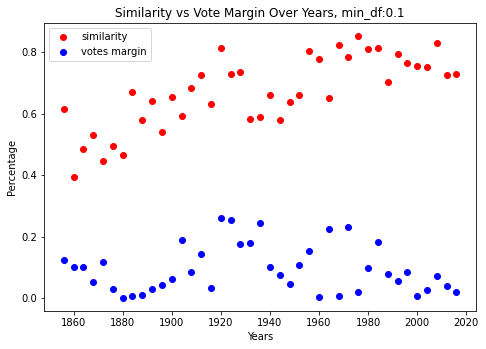

No handles with labels found to put in legend.


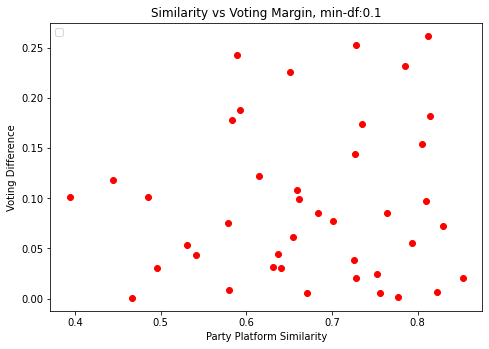

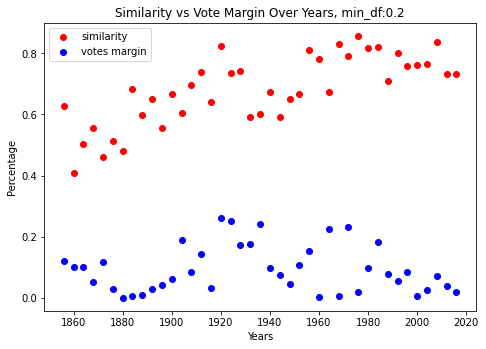

No handles with labels found to put in legend.


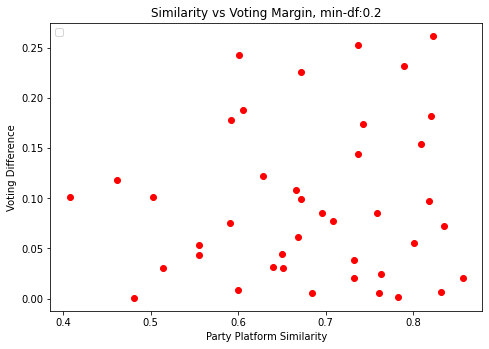

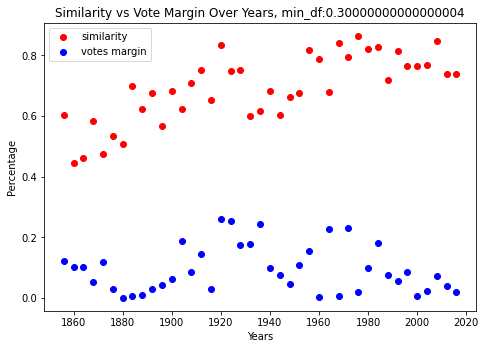

No handles with labels found to put in legend.


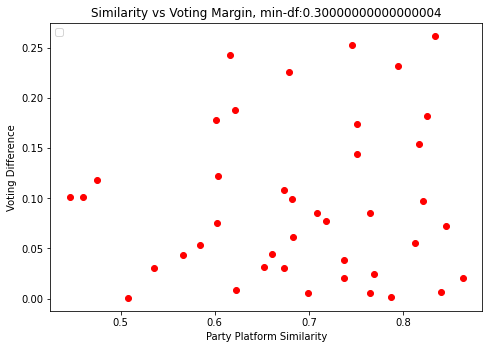

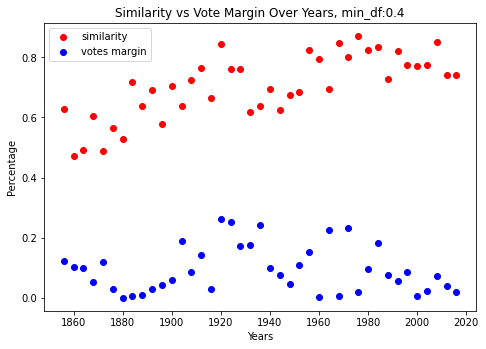

No handles with labels found to put in legend.


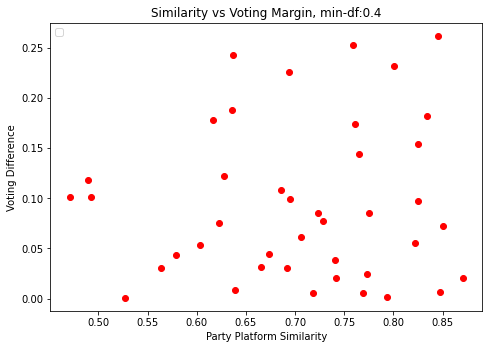

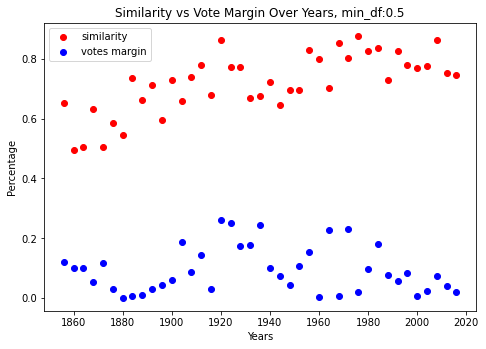

No handles with labels found to put in legend.


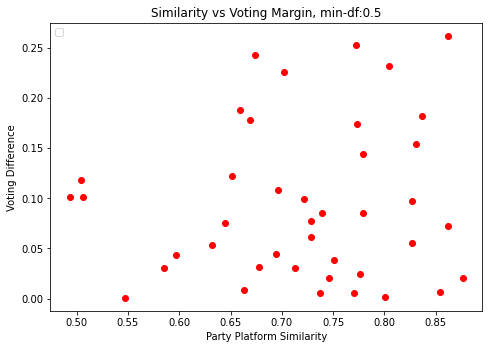

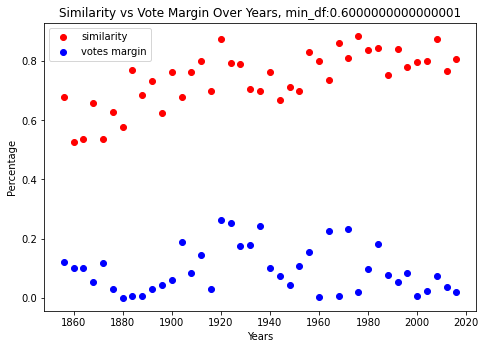

No handles with labels found to put in legend.


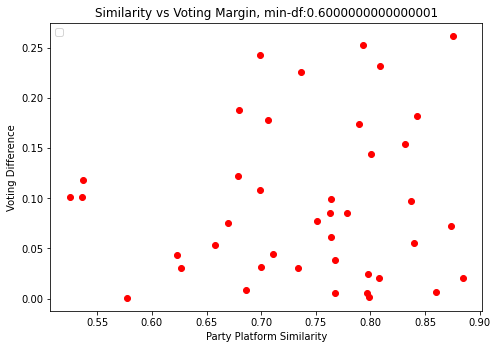

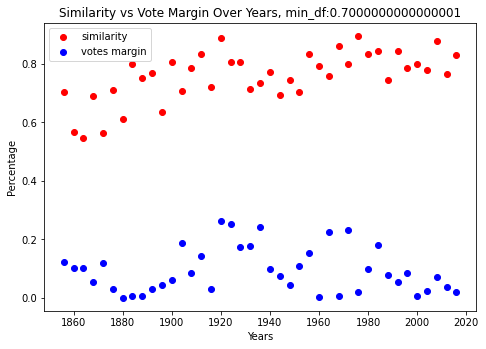

No handles with labels found to put in legend.


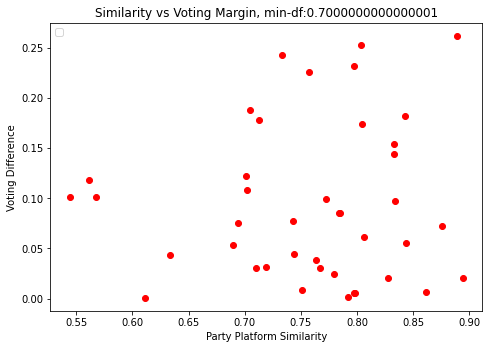

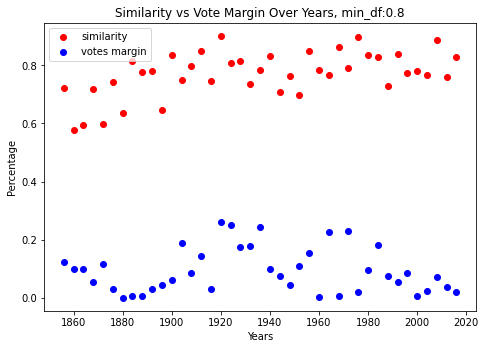

No handles with labels found to put in legend.


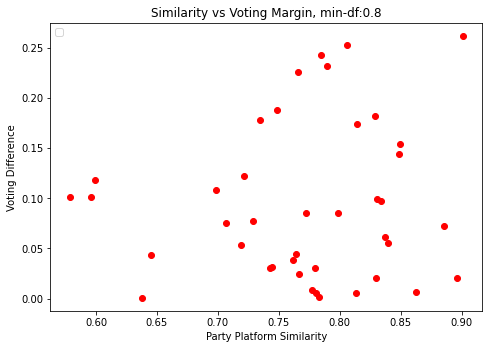

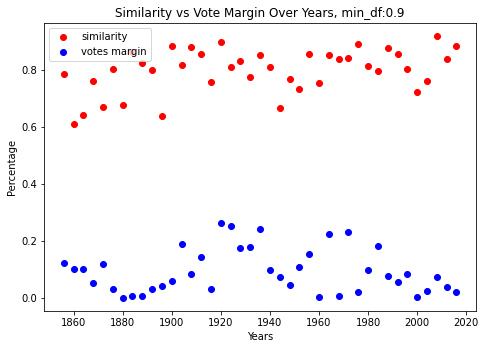

No handles with labels found to put in legend.


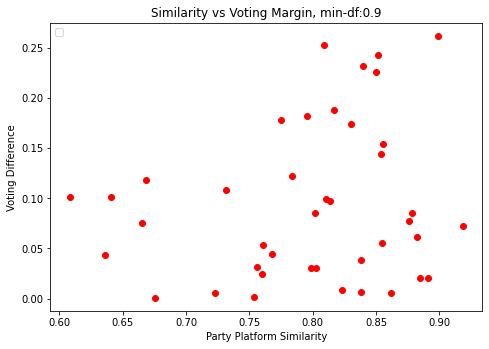

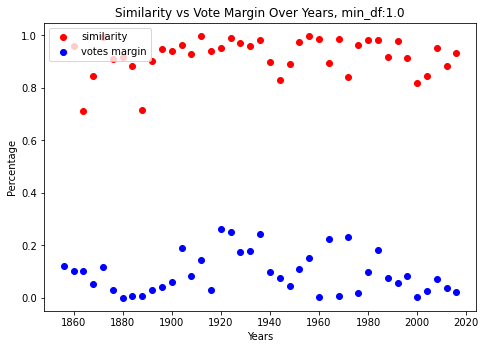

No handles with labels found to put in legend.


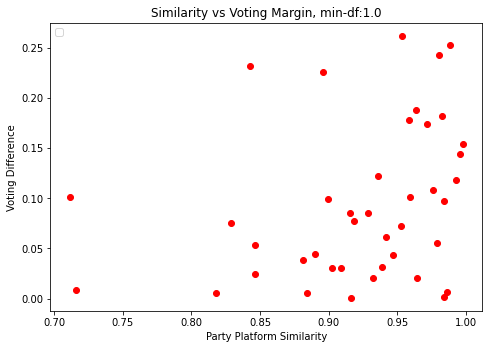

In [554]:
for i in range(10):
  minn = 0.1*(i+1)
  cv = CountVectorizer(long_combine,min_df=minn) #unigram only 
  count_vector = cv.fit_transform(long_combine)
  feats_here = cv.get_feature_names();
  count_vector = count_vector.toarray()
  pairwise_sim = cosine_similarity(count_vector)
  simdf = pd.DataFrame(pairwise_sim, columns = name_combine, index = name_combine)
  sim_data =[]
  j = int(len(simdf)/2)
  for i in range(0,j):
    sim_data.append(simdf.iloc[(i*2)+1][i*2]) 

  fig=plt.figure()
  ax=fig.add_axes([0,0,1,1])
  ax.scatter(date, sim_data, color='r',label="similarity")
  ax.scatter(date,diff, color='b',label="votes margin")
  ax.set_xlabel('Years')
  ax.set_ylabel('Percentage')
  ax.set_title('Similarity vs Vote Margin Over Years, min_df:'+str(minn))
  plt.legend(loc='upper left')
  plt.show()

  fig=plt.figure()
  ax=fig.add_axes([0,0,1,1])
  ax.scatter(sim_data, diff,color='r') #sim_data = platform diff
  ax.set_xlabel('Party Platform Similarity')
  ax.set_ylabel('Voting Difference')
  ax.set_title('Similarity vs Voting Margin, min-df:'+str(minn))
  plt.legend(loc='upper left')
  plt.show()

##Difference of Margin Between Unigram and Voting Result

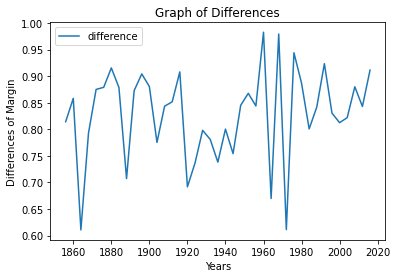

In [555]:
#Between Unigram and 
plt.xlabel('Years')
plt.ylabel('Differences of Margin')
plt.plot(date,(np.array(sim_data)-np.array(diff)),label="difference")
plt.title("Graph of Differences")
plt.legend(loc='upper left')
plt.show()

##Bar Chart For Consine Difference For Unigram and Against The Vote Difference

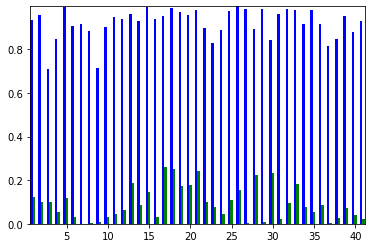

In [556]:
x_l = []
x_r = []
for i in range(len(date)):
  x_r.append(i+1)
  x_l.append(float((i+1)-0.3))

y = sim_data #cosine
z = diff #actual vote diff

ax = plt.subplot(111)
w = 0.3
ax.bar(x_l, y, width=w, color='b', align='center')
ax.bar(x_r, z, width=w, color='g', align='center')

ax.autoscale(tight=True)

plt.show()

##Trying To Test If There is Directional Correlation

In [557]:
increase_data = []
for i in range(len(sim_data)-1):#increasing
  if (sim_data[i+1]-sim_data[i]>0):
    increase_data.append(1)
  else:
    increase_data.append(0)

increase_diff=[]
for i in range(len(diff)-1):
  if (diff[i+1]-diff[i]>0):
    increase_diff.append(1)
  else:
    increase_diff.append(0)

duration_between = []
for i in range(len(date)-1):
  duration_between.append(str(date[i])+"-"+str(date[i+1]))

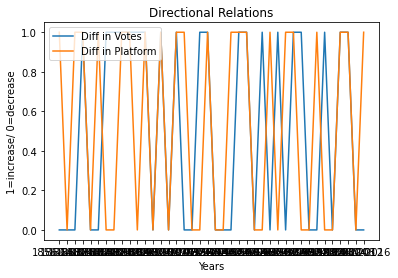

In [558]:
plt.xlabel('Years')
plt.ylabel('1=increase/ 0=decrease')
plt.plot(duration_between,increase_diff,label="Diff in Votes")
plt.plot(duration_between,increase_data,label="Diff in Platform")
plt.title("Directional Relations")
plt.legend(loc='upper left')
plt.show()

#TF-IDF 

In [559]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(long_combine,min_df=0.3) #Test, 0.1-0.5
count_vector =tfidf.fit_transform(long_combine)
feats = tfidf.get_feature_names()
count_vector = count_vector.toarray()
df3 = pd.DataFrame(count_vector,columns=feats,index=name_combine)
df3

,10,100,11,12,15,20,25,30,40,ability,able,abroad,abuse,abuses,accept,access,accomplish,accomplished,accordance,according,account,achieve,achieved,achievement,achievements,achieving,acquisition,across,act,action,actions,active,actively,activities,activity,acts,actual,actually,added,addition,...,welcome,welfare,well,wellbeing,west,western,whatever,whenever,wherever,whether,white,whole,whose,widows,wildlife,willing,wisdom,wise,wisely,wish,withdrawal,within,without,women,words,work,worker,workers,working,works,world,worlds,worldwide,worth,would,year,years,yet,young,youth
1856_d.txt,0.024604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024228,0.000000,0.000000,0.000000,0.000000,0.000000,0.024993,0.000000,0.000000,0.024604,0.031571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020395,0.023505,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.033587,0.000000,0.000000,0.020674,0.087429,0.023158,0.000000,0.000000,0.000000,0.038666,0.049143,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033587,0.028987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046209,0.000000,0.000000,0.000000,0.015216,0.000000,0.000000,0.000000,0.000000,0.000000
1856_r.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048028,0.000000,0.000000,0.000000,...,0.000000,0.034747,0.034315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039503,0.033471,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031473,0.000000,0.000000,0.000000,0.031091,0.000000,0.000000,0.000000,0.000000,0.000000
1860_d.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078052,0.000000,0.000000,0.129392,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059970,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073828,0.000000,0.000000,0.000000,0.000000
1860_r.txt,0.048476,0.000000,0.054380,0.050029,0.055347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.057807,0.045627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040182,0.046310,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043063,0.045627,0.000000,0.035694,0.000000,0.076179,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.057110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030347,0.000000,0.000000,0.000000
1864_d.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067400,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.112396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0

In [560]:
pairwise_sim = cosine_similarity(count_vector)
simdf = pd.DataFrame(pairwise_sim, columns = name_combine, index = name_combine)
sim_data =[]
j = int(len(simdf)/2)
for i in range(0,j):
  sim_data.append(1-simdf.iloc[(i*2)+1][i*2])

#Graph for TD-IDF against Voting Difference

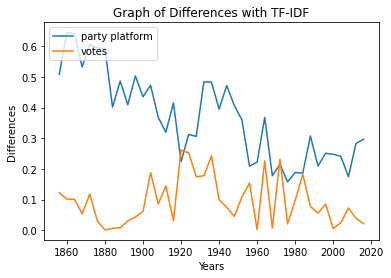

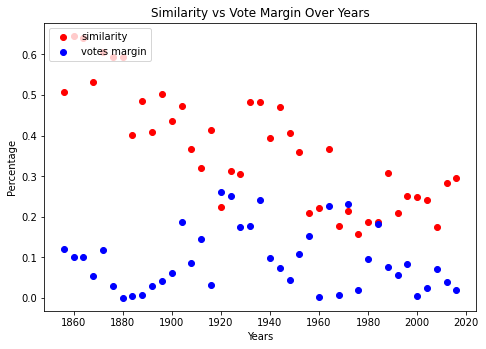

In [561]:
plt.xlabel('Years')
plt.ylabel('Differences')
plt.plot(date,sim_data,label="party platform")
plt.plot(date,diff,label="votes")
#plt.plot(date,(np.array(sim_data)-np.array(diff)),label="difference")
plt.title("Graph of Differences with TF-IDF")
plt.legend(loc='upper left')
plt.show()

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(date, sim_data, color='r',label="similarity")
ax.scatter(date,diff, color='b',label="votes margin")
ax.set_xlabel('Years')
ax.set_ylabel('Percentage')
ax.set_title('Similarity vs Vote Margin Over Years')
plt.legend(loc='upper left')
plt.show()

##Graph for Difference of Difference

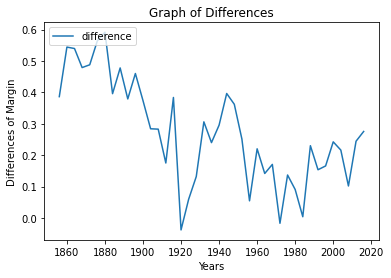

In [562]:
plt.xlabel('Years')
plt.ylabel('Differences of Margin')
plt.plot(date,(np.array(sim_data)-np.array(diff)),label="difference")
plt.title("Graph of Differences")
plt.legend(loc='upper left')
plt.show()

##For loop testing min-df=0.1-1.0

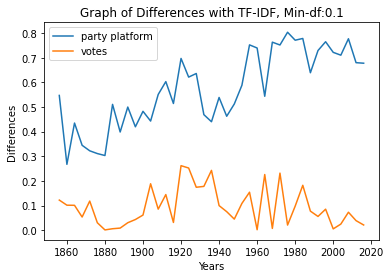

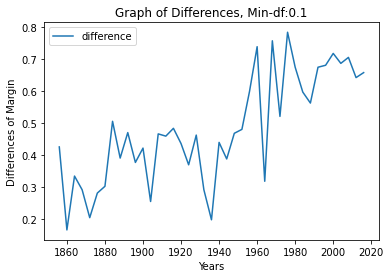

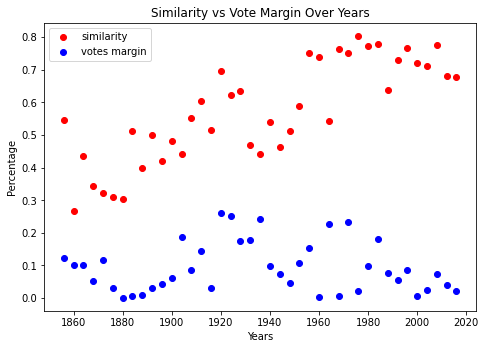

No handles with labels found to put in legend.


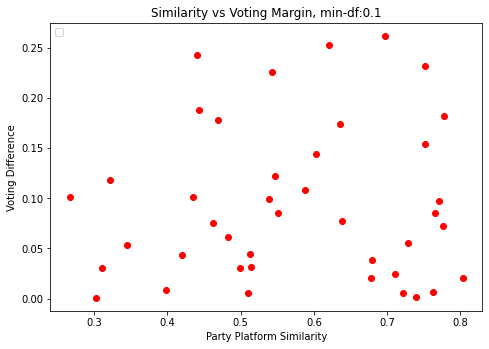

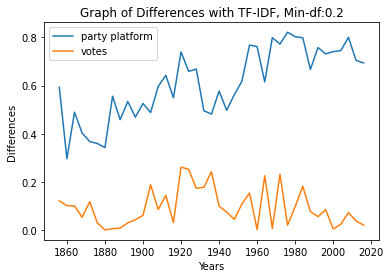

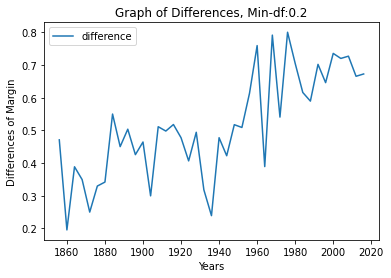

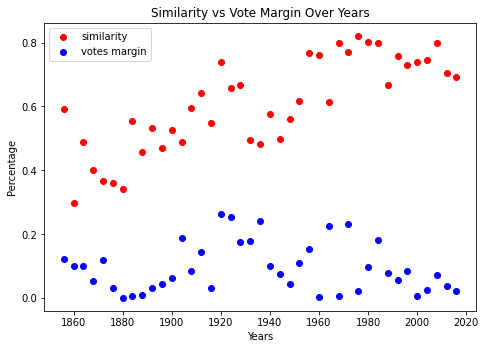

No handles with labels found to put in legend.


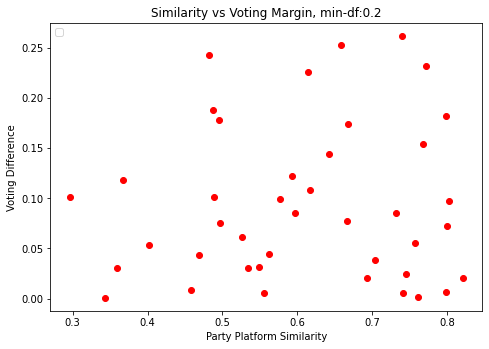

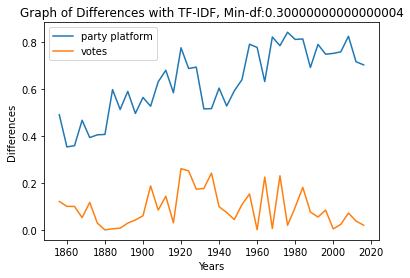

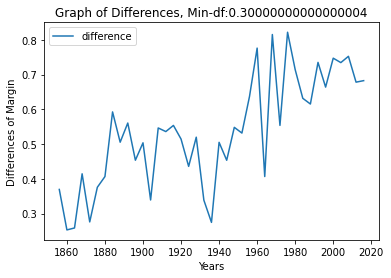

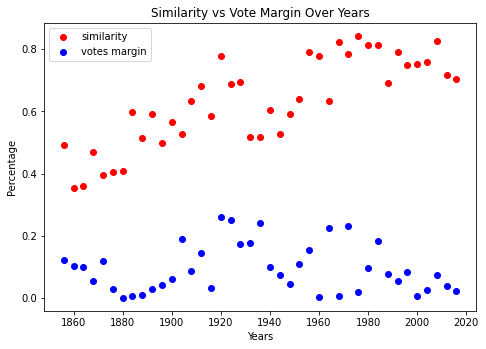

No handles with labels found to put in legend.


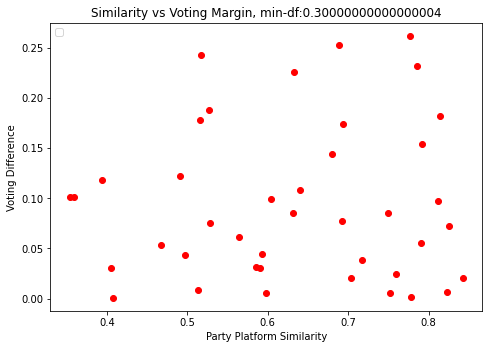

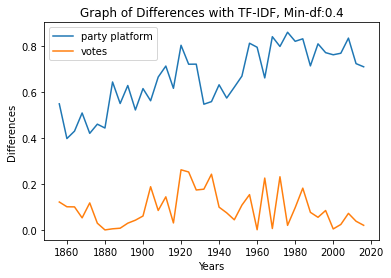

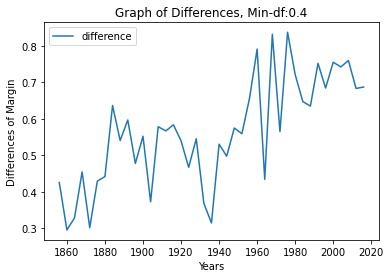

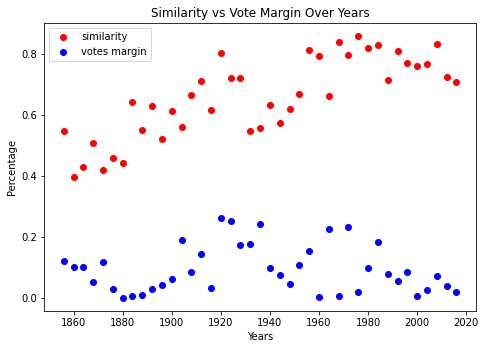

No handles with labels found to put in legend.


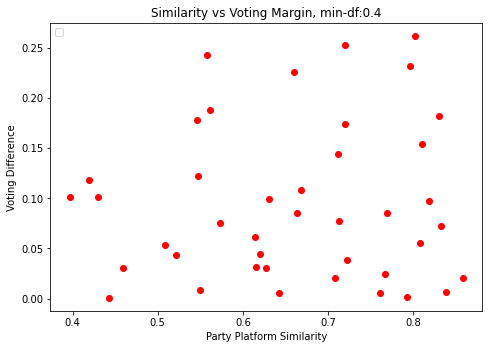

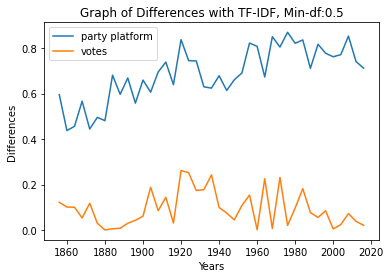

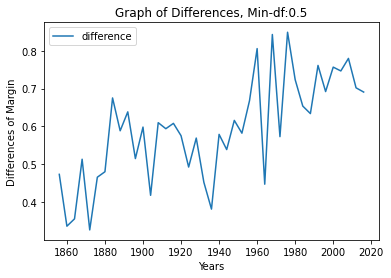

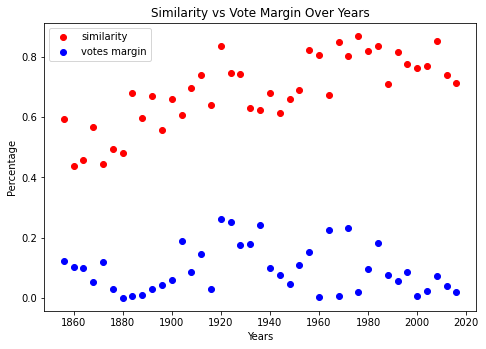

No handles with labels found to put in legend.


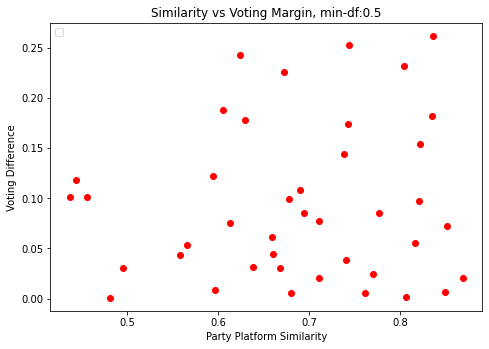

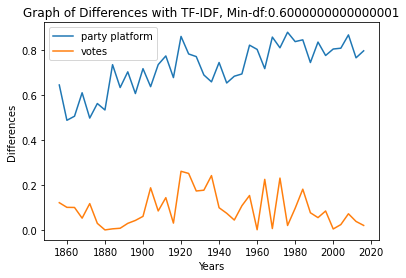

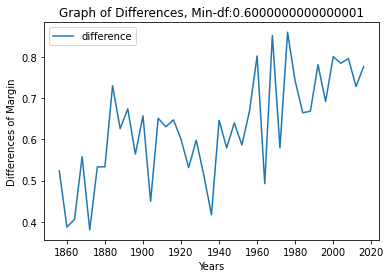

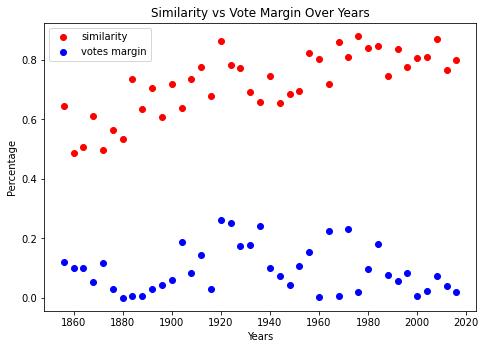

No handles with labels found to put in legend.


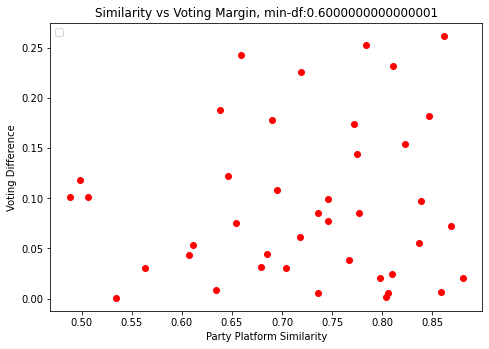

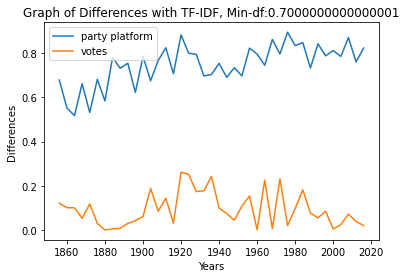

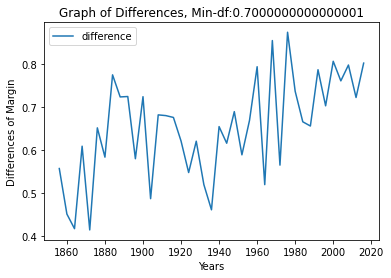

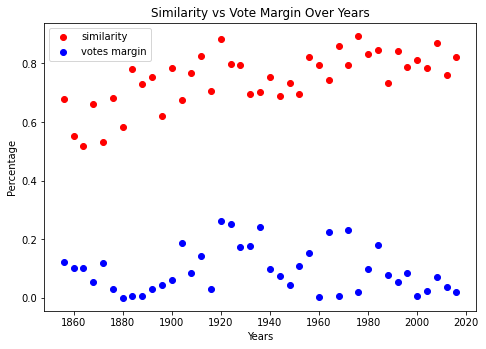

No handles with labels found to put in legend.


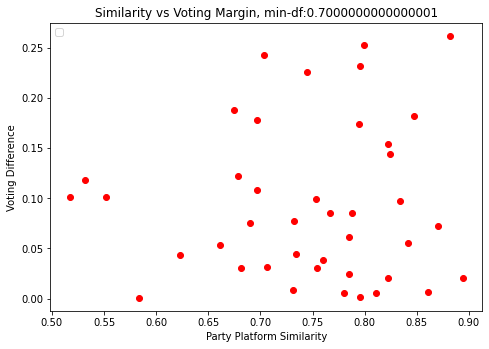

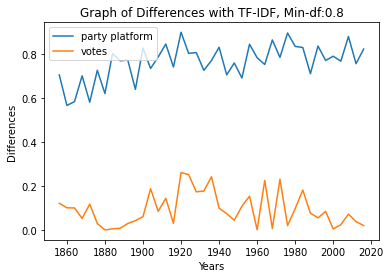

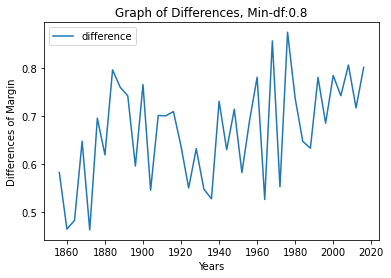

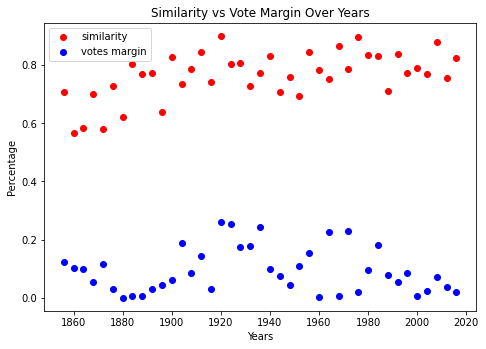

No handles with labels found to put in legend.


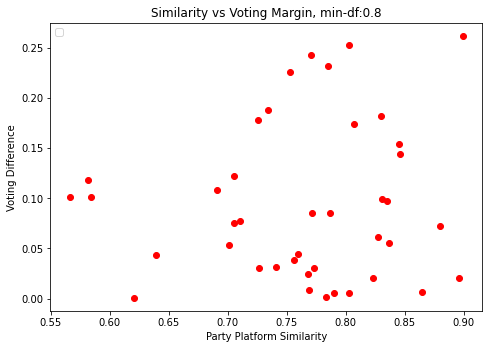

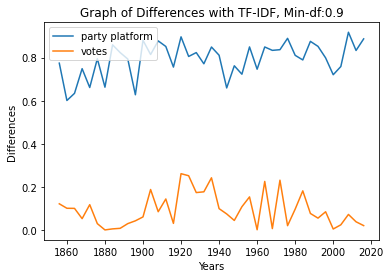

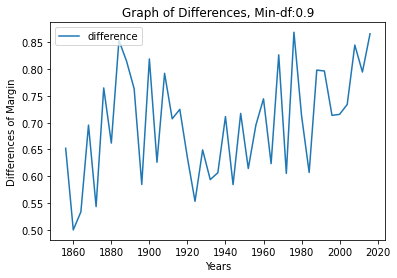

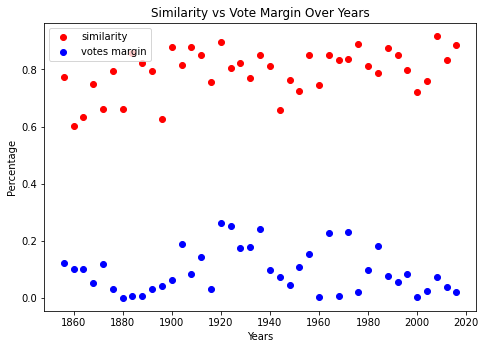

No handles with labels found to put in legend.


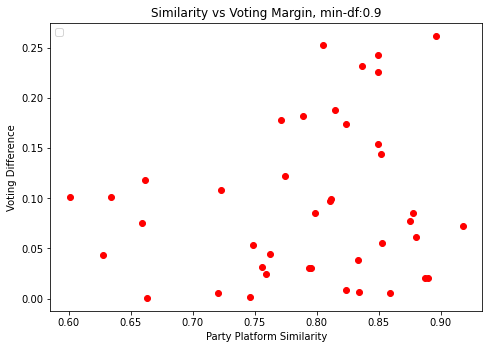

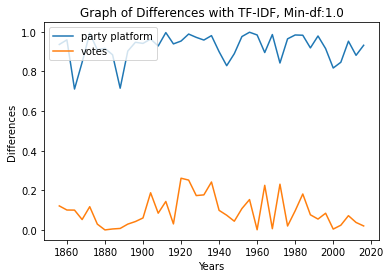

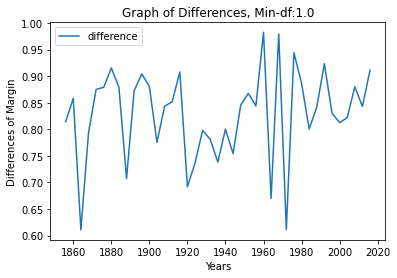

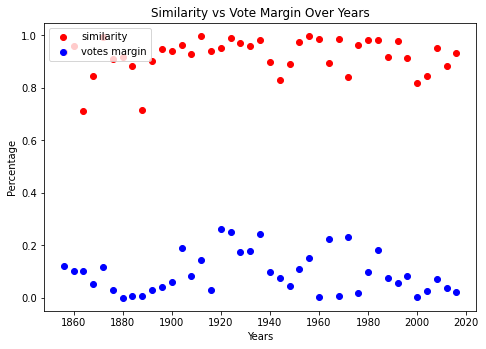

No handles with labels found to put in legend.


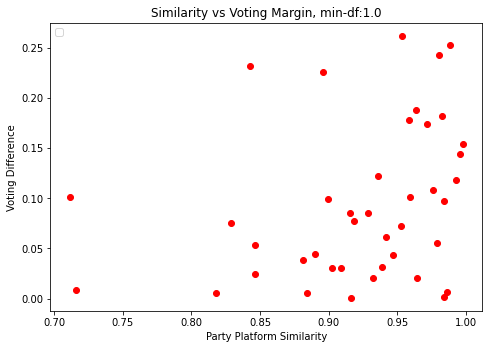

In [563]:
average_difference = []
df_value = []
for i in range(10):
  minn = 0.1*(i+1)
  tfidf = TfidfVectorizer(long_combine,min_df=minn) #Test, 0.1-0.5
  count_vector =tfidf.fit_transform(long_combine)
  feats = tfidf.get_feature_names()
  count_vector = count_vector.toarray()
  df3 = pd.DataFrame(count_vector,columns=feats,index=name_combine)
  pairwise_sim = cosine_similarity(count_vector)
  simdf = pd.DataFrame(pairwise_sim, columns = name_combine, index = name_combine)
  sim_data =[]
  j = int(len(simdf)/2)
  for i in range(0,j):
    sim_data.append(simdf.iloc[(i*2)+1][i*2])
  
  avg = 0.0
  for i in range(len(sim_data)):
    avg+=sim_data[i]-diff[i]
  avg/=len(sim_data)
  average_difference.append(avg)
  df_value.append(minn)

  plt.xlabel('Years')
  plt.ylabel('Differences')
  plt.plot(date,sim_data,label="party platform")
  plt.plot(date,diff,label="votes")
  #plt.plot(date,(np.array(sim_data)-np.array(diff)),label="difference")
  plt.title("Graph of Differences with TF-IDF, Min-df:"+ str(minn))
  plt.legend(loc='upper left')
  plt.show()

  plt.xlabel('Years')
  plt.ylabel('Differences of Margin')
  plt.plot(date,(np.array(sim_data)-np.array(diff)),label="difference")
  plt.title("Graph of Differences, Min-df:"+ str(minn))
  plt.legend(loc='upper left')
  plt.show()

  fig=plt.figure()
  ax=fig.add_axes([0,0,1,1])
  ax.scatter(date, sim_data, color='r',label="similarity")
  ax.scatter(date,diff, color='b',label="votes margin")
  ax.set_xlabel('Years')
  ax.set_ylabel('Percentage')
  ax.set_title('Similarity vs Vote Margin Over Years')
  plt.legend(loc='upper left')
  plt.show()

  #barchart
  # x_l = []
  # x_r = []
  # for i in range(len(date)):
  #   x_r.append(i+1)
  #   x_l.append(float((i+1)-0.3))

  # y = sim_data #cosine
  # z = diff #actual vote diff

  # ax = plt.subplot(111)
  # w = 0.3
  # ax.bar(x_l, y, width=w, color='b', align='center')
  # ax.bar(x_r, z, width=w, color='g', align='center')

  # ax.autoscale(tight=True)

  # plt.show()


  fig=plt.figure()
  ax=fig.add_axes([0,0,1,1])
  ax.scatter(sim_data, diff,color='r') #sim_data = platform diff
  ax.set_xlabel('Party Platform Similarity')
  ax.set_ylabel('Voting Difference')
  ax.set_title('Similarity vs Voting Margin, min-df:'+str(minn))
  plt.legend(loc='upper left')
  plt.show()

#Graph for change of Difference (TF-IDF)

No handles with labels found to put in legend.


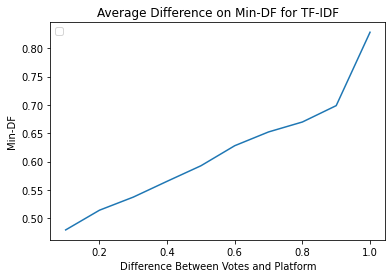

In [564]:
plt.xlabel('Difference Between Votes and Platform')
plt.ylabel('Min-DF')
plt.plot(df_value,average_difference)
plt.title("Average Difference on Min-DF for TF-IDF")
plt.legend(loc='upper left')
plt.show()